In [1]:
import skimage
from skimage import color
from pylab import *
from skimage import img_as_float
import numpy as np


In [17]:
def bilateral(imgIn, radius, sigma_s, sigma_r):
    
    imgPadded = np.pad(imgIn, ((radius,radius),(radius,radius)) ,mode = 'reflect') 
    indexOriginal = (radius,radius); 
    gaus_fgv = lambda x,s : (np.exp( -0.5*x/(s**2) )) 
    imgOut = zeros(shape(imgIn)) 
    normKoef = 0    
    for pomerajX in range(-radius,radius+1):
        for pomerajY in range(-radius,radius+1):
            w_distanca = gaus_fgv((pomerajX**2 + pomerajY**2), sigma_s)
            w_razlikaPixela = gaus_fgv((imgIn - imgPadded[(indexOriginal[0] + pomerajY):(indexOriginal[0] + pomerajY + shape(imgIn)[0]),
                                                         (indexOriginal[1] + pomerajX):(indexOriginal[1] + pomerajX + shape(imgIn)[1])])**2,sigma_r)
            w = w_distanca * w_razlikaPixela;
            imgOut += w * imgPadded[(indexOriginal[0] + pomerajY):(indexOriginal[0] + pomerajY)+(shape(imgIn)[0] ),
                                                         (indexOriginal[1] + pomerajX):(indexOriginal[1] + pomerajX)+(shape(imgIn)[1] )]
            normKoef += w
    
    return imgOut/normKoef

In [14]:
def bilateralNoForLoops(imgIn, radius, sigma_s, sigma_r):
    shifts = np.arange(-radius,radius+1)
    shifts_combinations = np.array(np.reshape(np.meshgrid(shifts,shifts), (shifts.size**2,2))) 
    indexOriginal = (radius,radius); #top left position of original image 
    
    
    
    ind1 = np.linspace((indexOriginal[0] + shifts_combinations[:,0]),(indexOriginal[0] + shifts_combinations[:,0] + shape(imgIn)[0] - 1),num = shape(imgIn)[0],dtype = 'int',axis = 1)
    ind2 = np.linspace((indexOriginal[1] + shifts_combinations[:,1]),(indexOriginal[1] + shifts_combinations[:,1] + shape(imgIn)[1] - 1),num = shape(imgIn)[1],dtype = 'int',axis = 1)
    gauss_pdf = lambda x,s : (np.exp( -0.5*x/(s**2) ))
    
    imgPadded = np.pad(imgIn, ((radius,radius),(radius,radius)) ,mode = 'reflect') 
    
    w_distance = gauss_pdf((shifts_combinations[:,0]**2 + shifts_combinations[:,1]**2), sigma_s)
    w_pixel_difference = gauss_pdf((imgIn - imgPadded[ind1,:][np.arange(imgPadded[ind1,:].shape[0])[:,None][:,np.newaxis],np.arange(imgPadded[ind1,:].shape[1])[:,None][np.newaxis,:],
                                                          np.reshape(ind2,(shifts.size**2,1,shape(imgIn)[1]))])**2,sigma_r)
    
   
    
    w = w_pixel_difference * np.reshape(w_distance,(shifts.size**2,1,1))
    
    imgOut = w * imgPadded[ind1,:][np.arange(imgPadded[ind1,:].shape[0])[:,None][:,np.newaxis],np.arange(imgPadded[ind1,:].shape[1])[:,None][np.newaxis,:],
                                                          np.reshape(ind2,(shifts.size**2,1,shape(imgIn)[1]))]
    
    return  np.sum(imgOut,axis = 0)/np.sum(w,axis = 0)

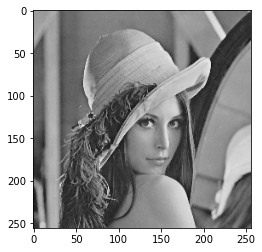

In [2]:
imgIn = color.rgb2gray(color.rgba2rgb((img_as_float(imread('8-bit-256-x-256-Grayscale-Lena-Image.png')))))
imshow(imgIn, cmap = 'gray', vmin = 0, vmax = 1)

In [19]:
imgOut1 = bilateralNoForLoops(imgIn,10,8,0.1)

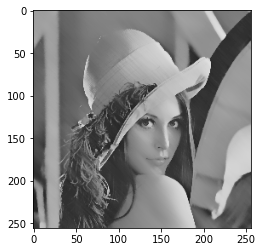

In [20]:
imshow(imgOut1,cmap='gray',vmin = 0,vmax = 1)

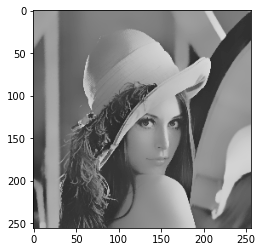

In [21]:
imgOut2 = bilateral(imgIn,10,8,0.1)
imshow(imgOut2,cmap='gray',vmin = 0,vmax = 1)